In [91]:
import os

import numpy as np
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
from IPython.display import SVG
import rdkit
print(rdkit.__version__)

2020.03.5


In [5]:
a = np.array([[1, 2, 3], [1, 1, 1]])
b = np.array([[0, 0, 0], [1, 0, 0], [0, 1, 1]])

In [6]:
distance_matrix(a, b)

array([[3.74165739, 3.60555128, 2.44948974],
       [1.73205081, 1.41421356, 1.        ]])

In [7]:
distance_matrix(b, b)

array([[0.        , 1.        , 1.41421356],
       [1.        , 0.        , 1.73205081],
       [1.41421356, 1.73205081, 0.        ]])

In [9]:
data_path = os.path.join("..", "data", "canonical_atom_rank_ligand", "ghose")

In [43]:
n = 0
matrices = list()
mols = list()
for pdbf in os.scandir(data_path):
    if not pdbf.name.endswith(".pdb"):
        continue
    mol = Chem.MolFromPDBFile(pdbf.path)
    conformer = mol.GetConformer(0)
    atom_coors = list()
    for atom in range(mol.GetNumAtoms()):
        pos = conformer.GetAtomPosition(atom)
        atom_coors.append((pos.x, pos.y, pos.z))
    dis_matrix = distance_matrix(np.array(atom_coors), np.array(atom_coors))
    matrices.append(dis_matrix)
    mols.append(mol)
    n += 1
    if n == 9:
        break

In [67]:
sns.set(rc={'figure.figsize':(13,8.27)})

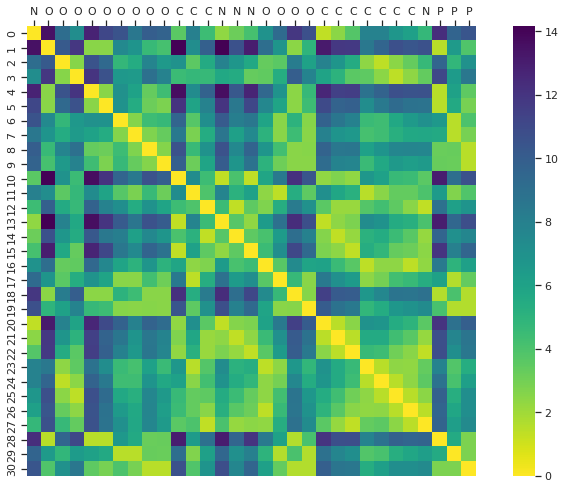

In [74]:
id = 0
mat = matrices[id]
m = mols[id]
ax = sns.heatmap(
    mat,
    square=True,
    cmap="viridis_r",
    xticklabels=[a.GetSymbol() for a in m.GetAtoms()]
)
ax.set_yticklabels(
    list(range(m.GetNumAtoms())),
    va="center"
)
ax.xaxis.tick_top()
ax.yaxis.tick_left()
ax.xaxis.set_label_position('top')
fig = ax.get_figure()
fig.savefig("matrix.png", dpi=150)

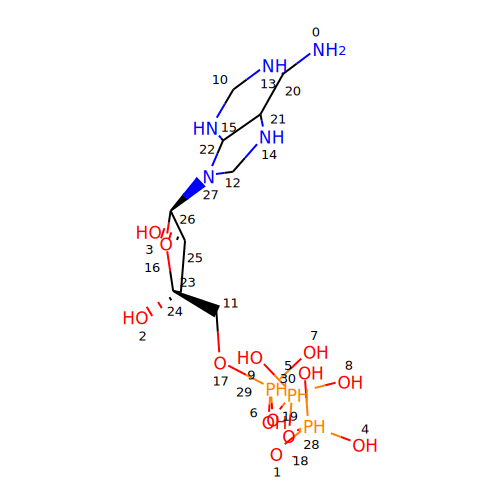

In [51]:
d2d = rdMolDraw2D.MolDraw2DSVG(500, 500)
d2d.drawOptions().addAtomIndices=True
d2d.DrawMolecule(mols[0])
d2d.FinishDrawing()
svg_text = d2d.GetDrawingText()
SVG(svg_text)

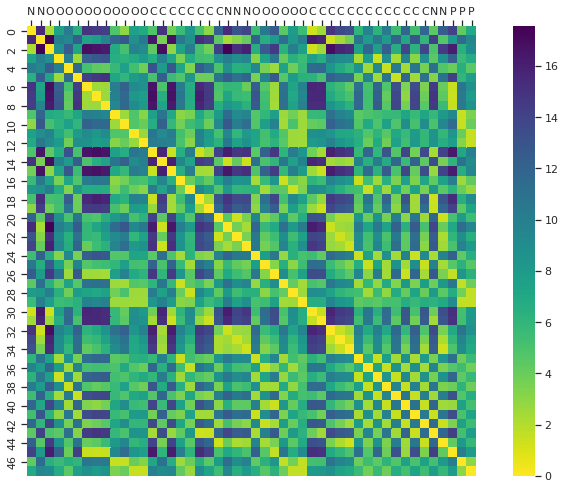

In [76]:
id = 1
mat = matrices[id]
m = mols[id]
ax = sns.heatmap(
    mat,
    square=True,
    cmap="viridis_r",
    xticklabels=[a.GetSymbol() for a in m.GetAtoms()]
)
ax.set_yticklabels(
    list(range(0, m.GetNumAtoms(), 2)),
    va="center"
)
ax.xaxis.tick_top()
ax.yaxis.tick_left()
ax.xaxis.set_label_position('top')
fig = ax.get_figure()
fig.savefig("matrix.png", dpi=150)

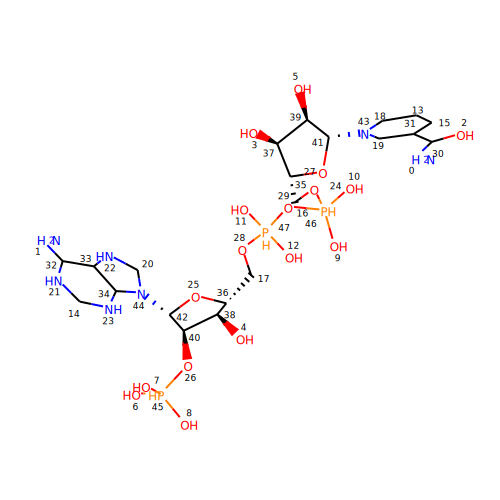

In [54]:
d2d = rdMolDraw2D.MolDraw2DSVG(500, 500)
d2d.drawOptions().addAtomIndices=True
d2d.DrawMolecule(mols[1])
d2d.FinishDrawing()
svg_text = d2d.GetDrawingText()
SVG(svg_text)

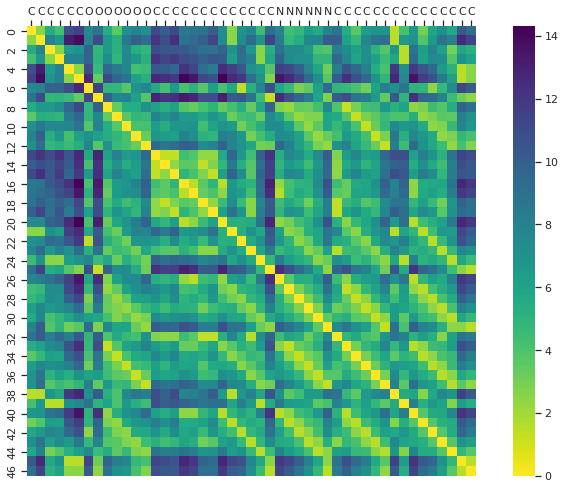

In [77]:
id = 2
mat = matrices[id]
m = mols[id]
ax = sns.heatmap(
    mat,
    square=True,
    cmap="viridis_r",
    xticklabels=[a.GetSymbol() for a in m.GetAtoms()]
)
ax.set_yticklabels(
    list(range(0, m.GetNumAtoms(), 2)),
    va="center"
)
ax.xaxis.tick_top()
ax.yaxis.tick_left()
ax.xaxis.set_label_position('top')
fig = ax.get_figure()
fig.savefig("matrix.png", dpi=150)

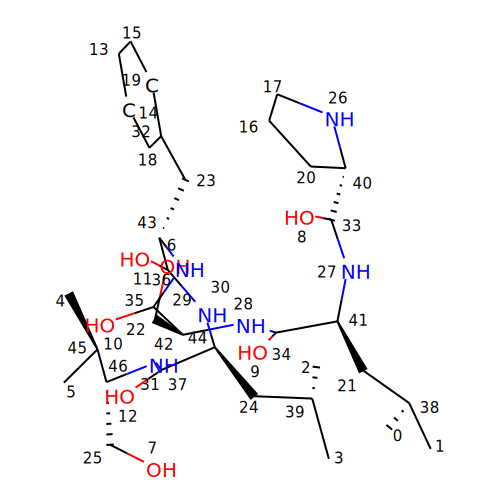

In [55]:
d2d = rdMolDraw2D.MolDraw2DSVG(500, 500)
d2d.drawOptions().addAtomIndices=True
d2d.DrawMolecule(mols[2])
d2d.FinishDrawing()
svg_text = d2d.GetDrawingText()
SVG(svg_text)

In [88]:
testmat = matrices[0]

In [89]:
rounded = np.round(testmat)
rounded[rounded > 10] = 11

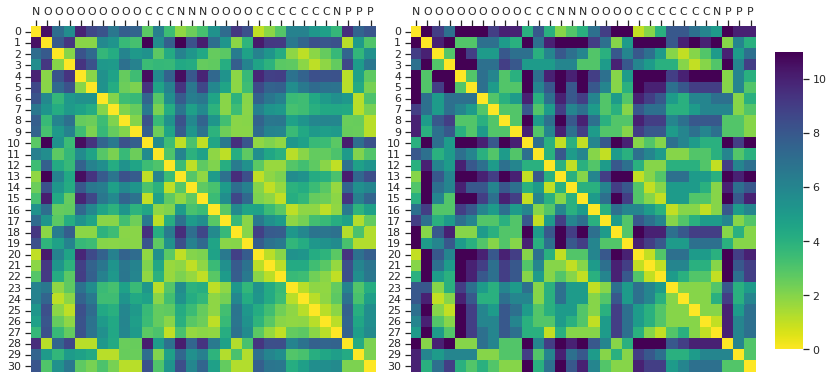

In [114]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.1)
ax = fig.add_subplot(1, 2, 1)
sns.heatmap(testmat,
    square=True,
    cmap="viridis_r",
    xticklabels=[a.GetSymbol() for a in mols[0].GetAtoms()],
    cbar=False,
    ax=ax
)
ax.set_yticklabels(
    list(range(0, mols[0].GetNumAtoms())),
    va="center"
)
ax.xaxis.tick_top()
ax.yaxis.tick_left()
ax.xaxis.set_label_position('top')
ax = fig.add_subplot(1, 2, 2)
cbar_ax = fig.add_axes([0.92, .25, .03, .5])
sns.heatmap(rounded,
    square=True,
    cmap="viridis_r",
    xticklabels=[a.GetSymbol() for a in mols[0].GetAtoms()],
    ax=ax,
    cbar_ax=cbar_ax
)
ax.set_yticklabels(
    list(range(0, mols[0].GetNumAtoms())),
    va="center"
)
ax.xaxis.tick_top()
ax.yaxis.tick_left()
ax.xaxis.set_label_position('top')
plt.show()

In [137]:
oh_mat = (np.arange(rounded.max()+1) == rounded[..., None]).astype(float)

In [138]:
oh_mat.shape

(31, 31, 12)

In [139]:
_3dto2d = np.argmax(oh_mat, axis=2) + 1

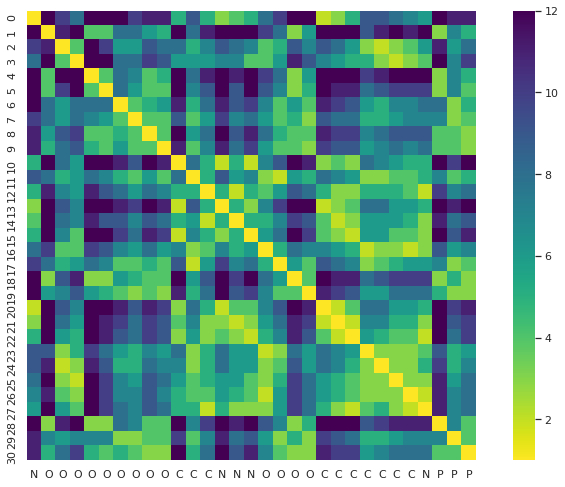

In [140]:
sns.heatmap(_3dto2d,
    square=True,
    cmap="viridis_r",
    xticklabels=[a.GetSymbol() for a in mols[0].GetAtoms()]
)
ax.set_yticklabels(
    list(range(0, mols[0].GetNumAtoms())),
    va="center"
)
ax.xaxis.tick_top()
ax.yaxis.tick_left()
ax.xaxis.set_label_position('top')

In [141]:
import torch

In [168]:
a = torch.tensor([[1,2],[3, 4]], dtype=torch.float)

In [169]:
a[a == 1] = 0

In [170]:
a

tensor([[0., 2.],
        [3., 4.]])

In [171]:
(torch.arange(a.max()+1) == a[..., None]).type(torch.float)

tensor([[[1., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0.]],

        [[0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 1.]]])

In [160]:
torch.round((torch.arange(a.max()+1) == a[..., None]).type(torch.float) / 3)

tensor([[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]])